In [34]:
import tensorflow as tf
import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt
# Load the dataset from keras
from tensorflow.keras.datasets import mnist

(train_x, train_y), (test_x, test_y) = mnist.load_data()

In [35]:
# test and train data sets size

print("training data set: x:%s , y:%s"%(train_x.shape, train_y.shape))
print("Testing data set: x:%s, y:%s" % (test_x.shape, test_y.shape))

training data set: x:(60000, 28, 28) , y:(60000,)
Testing data set: x:(10000, 28, 28), y:(10000,)


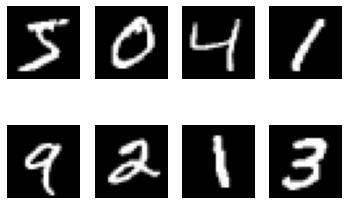

In [36]:
ndata_train = train_x.shape[0]
ndata_test = test_x.shape[0]

#Scaling them to be within 0 to 1
train_x, test_x = train_x/255, test_x/255

#Visualize a few images
for i in range(8):
  plt.subplot(240 + 1 + i)
  plt.imshow(train_x[i], cmap= plt.get_cmap('gray'))
  plt.axis('off')


In [37]:
#Reshaping into a 3D matrix of all images
train_x = train_x.reshape((ndata_train,28,28,1))
test_x = test_x.reshape((ndata_test,28,28,1))

#Recording the shape of x
xshape = train_x.shape[1:4]

train_x.shape[1:4]

(28, 28, 1)

In [38]:

from tensorflow._api.v2.nn import softplus, softmax
from tensorflow.python.ops.nn_ops import relu
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization

from tensorflow.keras.layers.experimental import preprocessing


#Define a Sequential Addition of Layers in TensorFlow/Keras
NNmodel = tf.keras.models.Sequential([preprocessing.RandomRotation(factor=0.05, fill_mode='constant'), 
                                      preprocessing.RandomZoom(height_factor=(-0.1,0.1), width_factor=(-0.1,0.1), fill_mode='constant'),
                                      preprocessing.RandomCrop(27,27)])
# [preprocessing.RandomRotation(factor=0.05, fill_mode='constant'), preprocessing.RandomZoom(height_factor=(-0.1,0.1), width_factor=(-0.1,0.1), fill_mode='constant')]

#Add the first convolution layer
NNmodel.add(tf.keras.layers.Conv2D(filters=16,kernel_size = (4,4), activation = tf.nn.relu, input_shape=xshape))

NNmodel.add(BatchNormalization())

#Add the second convolution layer
NNmodel.add(tf.keras.layers.Conv2D(filters=16,kernel_size = (4,4), activation = tf.nn.sigmoid, input_shape=xshape))

NNmodel.add(BatchNormalization())

#Add the Max Pooling layer
NNmodel.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=1))

NNmodel.add(Dropout(0.25))


#############################################################################################################
#Add the first convolution layer
NNmodel.add(tf.keras.layers.Conv2D(filters=32,kernel_size = (4,4), activation = tf.nn.relu, input_shape=xshape))

NNmodel.add(BatchNormalization())

#Add the second convolution layer
NNmodel.add(tf.keras.layers.Conv2D(filters=32,kernel_size = (4,4), activation = tf.nn.sigmoid, input_shape=xshape))

NNmodel.add(BatchNormalization())

#Add the Max Pooling layer
NNmodel.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=1))

NNmodel.add(Dropout(0.25))
#############################################################################################################


#############################################################################################################
#Add the first convolution layer
NNmodel.add(tf.keras.layers.Conv2D(filters=64,kernel_size = (4,4), activation = tf.nn.relu, input_shape=xshape))

NNmodel.add(BatchNormalization())

#Add the second convolution layer
NNmodel.add(tf.keras.layers.Conv2D(filters=64,kernel_size = (4,4), activation = tf.nn.sigmoid, input_shape=xshape))

NNmodel.add(BatchNormalization())

#Add the Max Pooling layer
NNmodel.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=1))

NNmodel.add(Dropout(0.25))
#############################################################################################################


#Flattten the convoluted and pooled output
NNmodel.add(tf.keras.layers.Flatten())

#Add the dense layer - with relu activation
NNmodel.add(tf.keras.layers.Dense(512, activation=relu, kernel_regularizer=tf.keras.regularizers.l1(0.0002)))
NNmodel.add(Dropout(0.25))

#Add another dense layer - with softplus activation
NNmodel.add(tf.keras.layers.Dense(1024, activation=softplus, kernel_regularizer=tf.keras.regularizers.l1(0.0005)))
NNmodel.add(Dropout(0.5))

#Add another dense layer - with softmax activation
NNmodel.add(tf.keras.layers.Dense(10, activation=softmax))

NNmodel.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

NNmodel.build(train_x.shape)

NNmodel.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 random_rotation_2 (RandomRo  (60000, 28, 28, 1)       0         
 tation)                                                         
                                                                 
 random_zoom_2 (RandomZoom)  (60000, 28, 28, 1)        0         
                                                                 
 random_crop_2 (RandomCrop)  (60000, 27, 27, 1)        0         
                                                                 
 conv2d_12 (Conv2D)          (60000, 24, 24, 16)       272       
                                                                 
 batch_normalization_12 (Bat  (60000, 24, 24, 16)      64        
 chNormalization)                                                
                                                                 
 conv2d_13 (Conv2D)          (60000, 21, 21, 16)      

In [39]:

history = NNmodel.fit(train_x, train_y, epochs = 10, validation_split=0.2, batch_size=200, verbose=0)

train_acc = NNmodel.evaluate(train_x, train_y, verbose=1)
test_acc = NNmodel.evaluate(test_x, test_y, verbose=1)
print("train loss and accuracy")
print(train_acc)
print("test loss and accuracy")
print(test_acc)


313/313 [==============================] - 1s 4ms/step - loss: 0.2430 - accuracy: 0.9907
train loss and accuracy
[0.24082159996032715, 0.9915833473205566]
test loss and accuracy
[0.24299423396587372, 0.9907000064849854]


**Both the training and validation accuracies have been found to be more than 99%**


# Retrain the model on the entire  data and save the model

In [41]:
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.models import load_model

# Create whole X and Y data
X = np.append(train_x, test_x, axis=0)
Y = np.append(train_y, test_y, axis=0)


# simple early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
NNmodel.save("best_model.h5")
print("saved the best model")
# fit model
history = NNmodel.fit(X, Y, epochs = 10, validation_split=0.2, batch_size=200, verbose=1, callbacks=[es])
# evaluate the model
train_acc = NNmodel.evaluate(X, Y, verbose=0)
test_acc = NNmodel.evaluate(test_x, test_y, verbose=0)
print("train loss and accuracy")
print(train_acc)
print("test loss and accuracy")
print(test_acc)


saved the best model
Epoch 1/10
280/280 [==============================] - 5s 17ms/step - loss: 0.2981 - accuracy: 0.9769 - val_loss: 0.2780 - val_accuracy: 0.9860
Epoch 2/10
280/280 [==============================] - 5s 16ms/step - loss: 0.2939 - accuracy: 0.9780 - val_loss: 0.2228 - val_accuracy: 0.9926
Epoch 2: early stopping
train loss and accuracy
[0.2210293412208557, 0.9936857223510742]
test loss and accuracy
[0.22163589298725128, 0.9930999875068665]


Here we can see that both the training and testing accuracies have been been improved owing to more no of examples for the model to learn from. As the increase in both test and train is comparable we can consider that the model is able to generalize well and isn't overfitting. This can help the model to generalize better and make more accurate predictions on unseen data.

# Check the images misclassified

In [42]:
# get the predictions
predictions = NNmodel.predict(X)

# convert the predictions to a categorical format
predictions = tf.argmax(predictions, axis=1)

# get the misclassified records
misclassified = tf.not_equal(predictions, Y)
misclassified_indices = tf.where(misclassified)
misclassified_images = tf.gather(X, misclassified_indices)
misclassified_labels = tf.gather(Y, misclassified_indices)

2188/2188 [==============================] - 7s 3ms/step


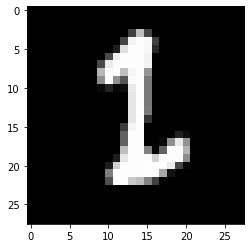

Predicted label:  tf.Tensor([2], shape=(1,), dtype=int64)
True label:  tf.Tensor([1], shape=(1,), dtype=uint8)


In [43]:

# convert tensor to numpy array
image_np = misclassified_images[0].numpy()
# reshape the image to 28x28 pixels
image_np = np.reshape(image_np, (28,28))
# plot the image
plt.imshow(image_np, cmap='gray')
plt.show()

misclassified_predictions = tf.gather(predictions, misclassified_indices)
misclassified_labels = tf.gather(Y, misclassified_indices)

print("Predicted label: ", misclassified_predictions[0])
print("True label: ", misclassified_labels[0])

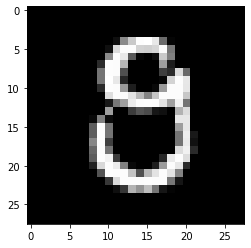

Predicted label:  tf.Tensor([8], shape=(1,), dtype=int64)
True label:  tf.Tensor([9], shape=(1,), dtype=uint8)


In [44]:

# convert tensor to numpy array
image_np = misclassified_images[1].numpy()
# reshape the image to 28x28 pixels
image_np = np.reshape(image_np, (28,28))
# plot the image
plt.imshow(image_np, cmap='gray')
plt.show()

misclassified_predictions = tf.gather(predictions, misclassified_indices)
misclassified_labels = tf.gather(Y, misclassified_indices)

print("Predicted label: ", misclassified_predictions[1])
print("True label: ", misclassified_labels[1])

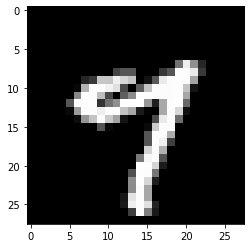

Predicted label:  tf.Tensor([7], shape=(1,), dtype=int64)
True label:  tf.Tensor([9], shape=(1,), dtype=uint8)


In [45]:

# convert tensor to numpy array
image_np = misclassified_images[2].numpy()
# reshape the image to 28x28 pixels
image_np = np.reshape(image_np, (28,28))
# plot the image
plt.imshow(image_np, cmap='gray')
plt.show()

misclassified_predictions = tf.gather(predictions, misclassified_indices)
misclassified_labels = tf.gather(Y, misclassified_indices)

print("Predicted label: ", misclassified_predictions[2])
print("True label: ", misclassified_labels[2])

#### As we can see the images which have been misclassified are very difficult even for a human to interpret. I think the author of this image after a few days may not be able to recognize such images. 

#### Therefore it isn't reasonable to expect 100% accuracy - if anyone claims 100% accuracy it should be by fluke and doesn't represent the real world scenario

In [46]:
# create a confusion matrix to store the mix-up counts
confusion_matrix = tf.math.confusion_matrix(Y, predictions)

confusion_matrix

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[6873,    1,    2,    2,    1,    0,   19,    1,    2,    2],
       [   0, 7831,   11,    4,    1,    9,    3,   17,    0,    1],
       [   2,    3, 6954,    4,    0,    0,    0,   24,    3,    0],
       [   0,    0,    9, 7097,    0,   23,    0,    2,    8,    2],
       [   0,    4,    1,    0, 6782,    0,    1,    4,    0,   32],
       [   2,    0,    1,   11,    0, 6252,   35,    2,    8,    2],
       [   5,    3,    2,    1,    5,    5, 6853,    0,    2,    0],
       [   0,    6,    5,    4,    2,    0,    0, 7268,    1,    7],
       [   3,    6,   11,    4,    6,    5,    9,    4, 6768,    9],
       [   0,    1,    0,    2,   37,    6,    0,   23,    9, 6880]],
      dtype=int32)>

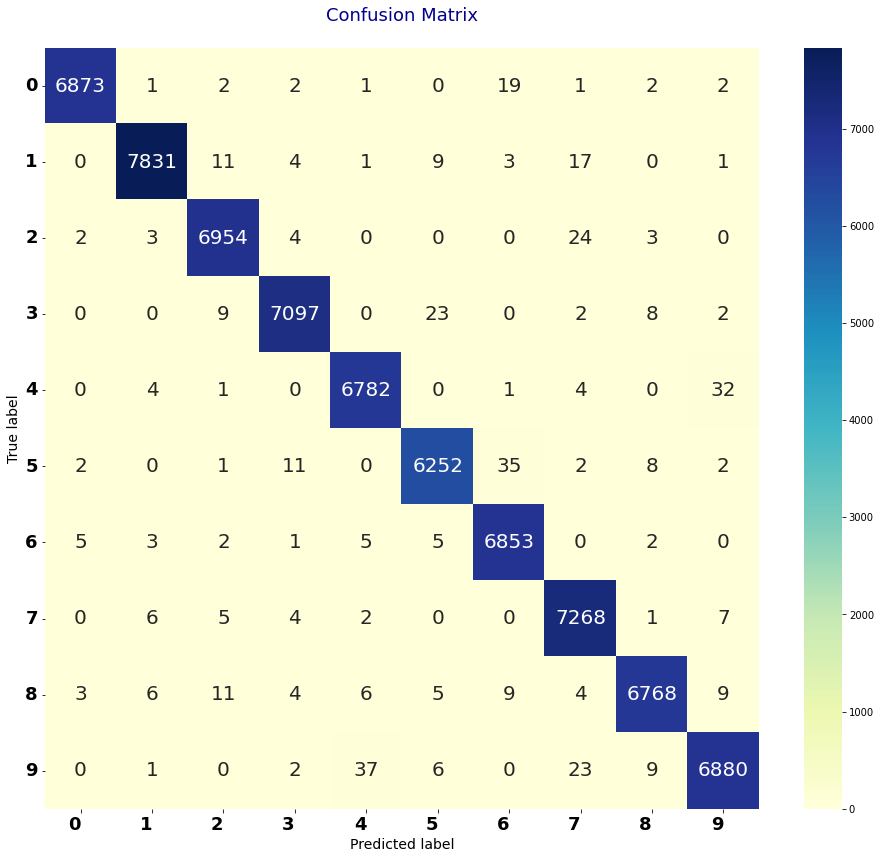

In [47]:
from matplotlib import pyplot as plt
import seaborn as sns
# Visualising confusion matrix
plt.figure(figsize = (16,14),facecolor='white')
heatmap = sns.heatmap(confusion_matrix, annot = True, annot_kws = {'size': 20}, fmt = 'd', cmap = 'YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation = 0, ha = 'right', fontsize = 18, weight='bold')
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation = 0, ha = 'right', fontsize = 18, weight='bold')

plt.title('Confusion Matrix\n', fontsize = 18, color = 'darkblue')
plt.ylabel('True label', fontsize = 14)
plt.xlabel('Predicted label', fontsize = 14)
plt.show()

In [48]:

# find the 2nd most common mix-up for each label
common_mixup = {}
for i in range(10):
    # find the index of the highest mix-up count for the current label
    max_index = tf.argmax(confusion_matrix[i, :])
    # find the count of the highest mix-up
    max_value = tf.reduce_max(confusion_matrix[i, :])
    # find the index of the second highest mix-up count for the current label
    second_max_index = tf.argsort(confusion_matrix[i, :],direction='DESCENDING')[1]
    second_max_value = confusion_matrix[i][second_max_index]
    common_mixup[i] = (second_max_index, second_max_value)
    
# print the 2nd common mix-up for each label
for label, mixup in common_mixup.items():
    print("Label: ", label, " - 2nd Common mix-up: ", mixup[0], " - Mix-up count: ", mixup[1])

Label:  0  - 2nd Common mix-up:  tf.Tensor(6, shape=(), dtype=int32)  - Mix-up count:  tf.Tensor(19, shape=(), dtype=int32)
Label:  1  - 2nd Common mix-up:  tf.Tensor(7, shape=(), dtype=int32)  - Mix-up count:  tf.Tensor(17, shape=(), dtype=int32)
Label:  2  - 2nd Common mix-up:  tf.Tensor(7, shape=(), dtype=int32)  - Mix-up count:  tf.Tensor(24, shape=(), dtype=int32)
Label:  3  - 2nd Common mix-up:  tf.Tensor(5, shape=(), dtype=int32)  - Mix-up count:  tf.Tensor(23, shape=(), dtype=int32)
Label:  4  - 2nd Common mix-up:  tf.Tensor(9, shape=(), dtype=int32)  - Mix-up count:  tf.Tensor(32, shape=(), dtype=int32)
Label:  5  - 2nd Common mix-up:  tf.Tensor(6, shape=(), dtype=int32)  - Mix-up count:  tf.Tensor(35, shape=(), dtype=int32)
Label:  6  - 2nd Common mix-up:  tf.Tensor(0, shape=(), dtype=int32)  - Mix-up count:  tf.Tensor(5, shape=(), dtype=int32)
Label:  7  - 2nd Common mix-up:  tf.Tensor(9, shape=(), dtype=int32)  - Mix-up count:  tf.Tensor(7, shape=(), dtype=int32)
Label:  8 

We can see that the most common mix up pairs are (6 and 8), (4 with 9), (7 with 1) and (9 with 4). This makes sense as the strokes in writing these numbers are very similar and the authors are prone to write these numbers with ambiguity for even normal humans to read and thus could be misclassified by the model.

# Load the saved model trained on entire data

In [49]:
# load and evaluate a saved model
from numpy import loadtxt
from tensorflow.keras.models import load_model
 
# load model
saved_model = load_model('best_model.h5')
# summarize model.
saved_model.summary()

# evaluate the model
score = saved_model.evaluate(test_x, test_y, verbose=0)
print("%s: %.2f%%" % (saved_model.metrics_names[1], score[1]*100))


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 random_rotation_2 (RandomRo  (None, 28, 28, 1)        0         
 tation)                                                         
                                                                 
 random_zoom_2 (RandomZoom)  (None, 28, 28, 1)         0         
                                                                 
 random_crop_2 (RandomCrop)  (None, 27, 27, 1)         0         
                                                                 
 conv2d_12 (Conv2D)          (None, 24, 24, 16)        272       
                                                                 
 batch_normalization_12 (Bat  (None, 24, 24, 16)       64        
 chNormalization)                                                
                                                                 
 conv2d_13 (Conv2D)          (None, 21, 21, 16)       

# Test the Saved Model on one image

1/1 [==============================] - 0s 165ms/step


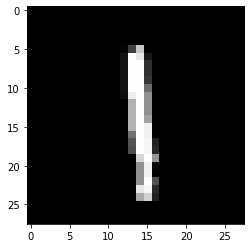

In [50]:
to_predict = np.array([train_x[8]])

output = saved_model.predict(to_predict)

pixels = to_predict[0].reshape((28, 28))

plt.imshow(pixels, cmap='gray')

In [51]:
np.argmax(output)

1

# Anvil Code Here

In [22]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: ignored

In [ ]:
!pip install anvil-uplink
import anvil.server
anvil.server.connect("KM6LGOUXN4YQWHSN3DD4RNKO-BDCFM6HXC4B4SAUA")

In [ ]:
@anvil.server.callable
def test_func(fetch_array):
 return_value = np.argmax(saved_model.predict(np.expand_dims(np.expand_dims(fetch_array, axis=0), axis=3)), axis=1)[0] # saved_model is the model to be used to predict
 return return_value

In [ ]:
anvil.server.wait_forever()